<a href="https://colab.research.google.com/github/jfpablos/TFM/blob/master/pruebaWebScraping/pruebaWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ENTORNO

In [0]:
import requests
from bs4 import BeautifulSoup
import re

In [16]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [57.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

## URLs

In [0]:
url = {
    'google': 'https://www.google.com/search?q=ibex+35&lr=&cr=countryES&hl=es&tbs=ctr:countryES&source=lnms&tbm=nws',
    'bing': 'https://www.bing.com/news/search?q=ibex+35&cc=es',
    'yahoo': 'https://es.news.search.yahoo.com/search?p=ibex+35',
    'duck': 'https://duckduckgo.com/?q=ibex+35&t=h_&iar=news&ia=news&kl=es-es&df=d',
    'ask': 'https://www.search.ask.com/search?ctype=news&q=ibex+35',
    'naver': 'https://search.naver.com/search.naver?where=news&query=ibex+35',
    'baidu': 'https://www.baidu.com/s?wd=ibex+35&tn=news&rtt=1',
    'yandex': 'https://news.yandex.com/yandsearch?rpt=nnews2&grhow=clutop&text=ibex%2035',
    'qwant' : 'https://www.qwant.com/?q=ibex+35&t=news&r=ES'
}

#https://www.bing.com/news/search?q=ibex+35&cc=IT para cambiar de pais se cambia el parametro cc= , pj: cc=IT Italia, cc=ES España, cc=DE Alemania
#https://www.qwant.com/?q=ibex+35&t=news&r=ES
#https://www.google.com/search?q=ibex+35&lr=&cr=countryDE&hl=es&tbs=ctr:countryDE&tbm=nws  countryDE cambiar este parametro para cambiar de pais p.j para cambiar a España countryES

## Google

In [5]:
def google():
  page = requests.get(url['google']).text
  soup = BeautifulSoup(page, "html.parser")
  texto = [t.find('h3').text + t.find(class_="st").text for t in soup.find_all("div", {"class" :"g"})]
  print(texto)
  
google()

['El Brexit e Inditex llevan a pérdidas al Ibex 35El Ibex 35 ha comenzado la sesión de este miércoles con un retroceso del 0,3% y cotizaba en los 9.134,1 puntos, penalizado por el retroceso\xa0...', 'Santander lidera las ganancias en el Ibex 35 después de que RBC ...Banco Santander sale al rescate del Ibex 35 este miércoles. El selectivo español podría sufrir un desplome arrastrado por las fuertes caídas de\xa0...', 'El beneficio conjunto de las cotizadas del Ibex 35 se redujo en 2 ...MADRID (EP). Las empresas que conforman el Ibex 35 registraron un beneficio neto agregado de 42.631,1 millones de euros al cierre del\xa0...', 'Las empresas del Ibex 35 ganaron más de 42.600 millones en 2018 ...Esta cifra recoge las cuentas de 34 de las 35 firman que componen el selectivo nacional, dado que no tiene en cuenta los resultados de\xa0...', 'Los principales directivos del Ibex 35 ganan 87 veces más que la ...Los principales ejecutivos del Ibex 35 ganaron en 2017 una remuneración media que fue 

## Bing 

In [5]:
def bing():
  page = requests.get(url['bing']).text
  soup = BeautifulSoup(page, "html.parser")
  text = [t.find(class_='title').text + t.find(class_='snippet').text for t in soup.find_all('div', class_='t_s')]
  print(text)
  
bing()
  

['El Ibex 35 ataca resistencias impulsado por la banca, a la espera de la votación para retrasar (o no) el BrexitEuropa vuelve a optar este jueves por las compras, pero con cautela. Las principales bolsas del Viejo Continente se tiñen de verde en una sesión en la que la atención sigue puesta en cualquier novedad ...', 'El Ibex 35 acaricia los 9.200 puntos con el empuje de la banca16:50 horas. El Ibex sueña con los 9.200 puntos El principal indicador de la Bolsa española, el Ibex 35, sueña con el nivel de los 9.200 puntos. A media hora para el cierre de mercados en España, el i...', 'El Ibex 35 amanece con tímidas subidas del 0,18%La falta de un rumbo claro hace a los mercados arrancar a cotizar con cautela, después del comportamiento asiático tras los datos macro en China y a la espera de ver qué ocurre hoy en Londres, donde p...', 'El Ibex-35 se queda a las puertas de los 9.200El Ibex-35 arrancaba la sesión con pérdidas, pero a partir de las once y media de la mañana entró en positivo

In [0]:
print(bing.status_code)

200


## Yahoo

In [7]:
def yahoo():
  page = requests.get(url['yahoo']).text
  soup = BeautifulSoup(page, "html.parser")
  text = [p.find('h3').text + p.find('p').text for p in soup.find(class_='searchCenterMiddle').find_all('li')]
    
  return text

print(yahoo())

['El Ibex avanza por el momentáneo alivio del Brexit aunque China impone cautelaEl Ibex-35 abría el jueves con un repunte moderado, animado por la reducción de ... ', 'El Ibex 35 acaricia los 9.200 puntos con el empuje de la banca16:50 horas. El Ibex sueña con los 9.200 puntosEl principal indicador de la Bolsa española, el Ibex 35, sueña con el nivel de los 9.200 puntos. A media hora para el cierre de mercados en España ... ', 'El IBEX 35 sube el 0,31 % a mediodía por la banca, que neutraliza a InditexMadrid, 13 mar (EFE). El principal indicador de la Bolsa española, el IBEX 35, se ha dado la vuelta y a mediodía sube el 0,31 %, gracias a la banca, sobre todo, a Santander, que con ganancias ... ', "El Ibex celebra que no habrá un 'hard Brexit' reconquistando los 9.200 puntosLa bolsa española ha abierto con suaves alzas del 0,4% para el Ibex 35, que cotiza en los 9.232 puntos. En el resto de Europa, el Dax suma un 0,1% y el EuroStoxx50 avanza el 0,1%, por un 0,3% que gana el Ftse MIB ita

## Duck

In [8]:
def duck():
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  wd.get("https://duckduckgo.com/?q=ibex+35&t=h_&iar=news&ia=news&kl=es-es&df=d")
  results=wd.find_elements_by_xpath("//div[@class='results js-vertical-results']/div/div/h2/a")

  description=[]

  for result in results:
      description.append(result.text)

  '''for i in range(len(description)):
      print(description[i])'''

  description = filter(None, description)
  print(list(description))

duck()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


['El IBEX 35 sube el 0,31 % a mediodía por la banca, que neutraliza a Inditex', 'La banca suple a Inditex y lleva al Ibex hacia los 9.200 puntos', 'Ibex en directo: sube la Bolsa gracias a Santander y pese a Inditex', 'El IBEX cae el 0,32 por ciento en la apertura por Inditex y el rechazo al "brexit"', 'Sin motivos para subir: el Ibex-35 cierra con un mínimo recorte', "El Ibex 35 abre a la baja, lastrado por Inditex y la incertidumbre sobre el 'Brexit'", 'El Ibex cierra con leve caída a la espera de la votación del Brexit', 'Castigo a Inditex en los mercados: el gigante textil encabeza las caídas en el Ibex 35 y el Eurostoxx 50', 'España reúne condiciones para ser líder en financiación sostenible', 'El Ibex cae por aversión al riesgo ante la incertidumbre del Brexit y el batacazo de Inditex', 'Las empresas del IBEX pagan 87 veces más a sus ejecutivos que a sus trabajadores', "Esperando el 'Brexit'", "El ibex se deja un 0,11% a la espera de noticias sobre el 'brexit' en reino unido - el

## Ask

In [14]:
def ask():
  page = requests.get(url['ask']).text
  soup = BeautifulSoup(page, "html.parser")
  texto = [' '.join((t.find(class_='news-title').text + t.find(class_='news-summary').text).split()) for t in soup.find_all('div', class_="news-content")]
  return texto
  
print(ask())

['Day of gains on Spanish Ibex-35 stock exchange MADRID, March 6 (Xinhua) -- The Spanish Ibex-35 stock exchange on Wednesday enjoyed a day of gains after two days of slight losses and although it was... More »', "Small loss seen on Spanish Ibex-35 stock exchange MADIRD, March 5 (Xinhua) -- The Spanish Ibex-35 stock exchange registered a very small loss on Tuesday's trading. Trading in Madrid closed on... More »", 'IBEX TECHNOLOGIES : Reports Plans to Close Iowa Production Facility IBEX Technologies Inc. (IBEX or the Company) (TSX Venture: IBT) today reported that it plans to close its Iowa production facility as of July 31,... More »', "Why did Instagram, YouTube and WhatsApp stop working? 35 minutes ago35 minutes ago Lots of people rely on sites like Instagram, Facebook, WhatsApp, YouTube, or Gmail, to send messages or stay up to date with what's happening, so it... More »", "Cheesy Easter egg and other unusual eggs 35 minutes ago35 minutes ago comments Sainsbury's There's a twist on 

## qwant

In [24]:
def qwant():
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  wd.get(url['qwant'])
  text = [t.text for t in wd.find_elements_by_xpath("//div[@class='result-type__news__item']/div[@class='result-type__news__text--container']/a")]
  return text
 
print(qwant())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


['El Ibex 35 defiende los 9.200 puntos en la media sesión con un ascenso del 0,25%, pendiente...', 'El Ibex 35 ataca resistencias impulsado por la banca, a la espera de la votación para retrasar...', 'El Ibex 35 lucha por los 9.200 puntos pendiente del Brexit', 'Ibex 35: La espera con subidas antes de la decisión del Brexit', 'El Ibex 35 amanece con tímidas subidas del 0,18%', '¿Por qué las compañías del Ibex 35 aumentan su dividendo si nos espera mayor volatilidad y desaceleración...', 'Santander impide que Inditex deje al Ibex 35 en rojo', 'El Ibex 35 se queda a las puertas de los 9.200 puntos con una subida del 0,34%', 'El Ibex-35 se viene abajo', 'IAG, de las que más sube en el Ibex 35 después de una mejora de recomendación de...']


## Naver

In [0]:
naver = requests.get(url_naver).text
soapNaver = BeautifulSoup(naver, "html.parser")

## Yandex

In [0]:
yandex = requests.get(url_yandex).text
soapYandex = BeautifulSoup(yandex, "html.parser")

## Baidu

In [0]:
try:
    baidu = requests.get(url_baidu).text
except:
    print("error en baidu")

In [0]:
soupBaidu = BeautifulSoup(baidu, "html.parser")
for text in soupBaidu.find_all('div', class_="c-summary"):
    result = text.get_text()
    print(result)

## Pruebas 

In [0]:
html_doc = """<div class="ts Pg8zWb b80nOe C1Iii FddHQd tsUanb"><a class="top NQHJEb dfhHve" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQvIgBCCwwAQ"><img class="th BbeB2d" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKOWOvzVV0g2QYIoCHVcEE3gL0KGhYGGiU6MrtTfX-vjlJu9-ra4r3fp-1QoWQmN_rqRonqot" alt="Imagen de la noticia para ibex 35 de La Vanguardia" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" data-atf="3"></a><div class="gG0TJc"><h3 class="r dO0Ag"><a class="l lLrAF" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQqQIILSgAMAE">El <em>Ibex 35</em> abre en rojo y ve cada vez más difícil los 9.000 puntos</a></h3><div class="slp"><span class="xQ82C e8fRJf">La Vanguardia</span><span class="v0c3xd">-</span><span class="f nsa fwzPFf">Hace 2 horas</span></div></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://okdiario.com/economia/mercados/2019/02/08/ibex-35-hoy-cae-alrededor-03-aferra-8-900-puntos-3680697" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://okdiario.com/economia/mercados/2019/02/08/ibex-35-hoy-cae-alrededor-03-aferra-8-900-puntos-3680697&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCC4oATAB">El <em>Ibex 35</em> hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos</a><br><span class="nsa xQ82C f e8fRJf">OKDIARIO</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 2 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-cae-031-apertura-aferra-8900-enteros-20190208091215.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-cae-031-apertura-aferra-8900-enteros-20190208091215.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCC8oAjAB">El <em>Ibex 35</em> cae un 0,31% en la apertura y se aferra a los 8.900 enteros</a><br><span class="nsa xQ82C f e8fRJf">Europa Press</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 3 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://valenciaplaza.com/duro-castigo-a-un-ibex-35-que-vuelve-a-alejarse-de-los-9000-puntos" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://valenciaplaza.com/duro-castigo-a-un-ibex-35-que-vuelve-a-alejarse-de-los-9000-puntos&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCDAoAzAB">Duro castigo a un <em>Ibex 35</em> que vuelve a alejarse de los 9.000 puntos</a><br><span class="nsa xQ82C f e8fRJf">valenciaplaza.com</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 17 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://www.estrategiasdeinversion.com/actualidad/noticias/bolsa-espana/seis-valores-del-ibex-35-que-reunen-calidad-y-n-417857" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.estrategiasdeinversion.com/actualidad/noticias/bolsa-espana/seis-valores-del-ibex-35-que-reunen-calidad-y-n-417857&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCDEoBDAB">Seis valores del <em>Ibex 35</em> que reúnen calidad y potencial a precios ...</a><br><span class="nsa xQ82C f e8fRJf">Estrategias de Inversión</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 5 horas</span></div><div class="gZQpfd"></div><div class="ErI7Gd card-section"><a class="RTNUJf" href="http://www.expansion.com/mercados/cronica-bolsa/2019/02/07/5c5bd713ca4741be598b4586.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.expansion.com/mercados/cronica-bolsa/2019/02/07/5c5bd713ca4741be598b4586.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQuogBCDIoBTAB">El <em>Ibex 35</em> pierde el 9.000 por las dudas sobre la economía europea</a><br><span class="HgetDe DwKiF">Opinión</span><span class="v0c3xd">-</span><span class="xQ82C e8fRJf">Expansión.com</span><span class="v0c3xd">-</span><span class="f nsa fwzPFf">Hace 18 horas</span><div class="cWEW3c"><a class="kl0Osd" href="https://news.google.com/news?ncl=d7Fc1Sx28KNHs8M89HhSUoxVcAN6M&amp;q=ibex+35&amp;lr=Spanish&amp;hl=es&amp;sa=X&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQqgIIMzAB">Ver todos</a></div></div><div class="gZQpfd"></div></div>"""
soup = BeautifulSoup(html_doc, 'html.parser')

In [0]:
print(soup.prettify())

<div class="ts Pg8zWb b80nOe C1Iii FddHQd tsUanb">
 <a class="top NQHJEb dfhHve" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQvIgBCCwwAQ">
  <img alt="Imagen de la noticia para ibex 35 de La Vanguardia" class="th BbeB2d" data-atf="3" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKOWOvzVV0g2QYIoCHVcEE3gL0KGhYGGiU6MrtTfX-vjlJu9-ra4r3fp-1QoWQmN_rqRonqot"/>
 </a>
 <div class="gG0TJc">
  <h3 class="r dO0Ag">
   <a class="l lLrAF" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-3

In [0]:
result=""
for text in soup.find_all('a', 'RTNUJf'):
    result = result + " " + text.get_text()  
print(result)
tokens = [t for t in result.split()]
print (tokens)

 El Ibex 35 hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos El Ibex 35 cae un 0,31% en la apertura y se aferra a los 8.900 enteros Duro castigo a un Ibex 35 que vuelve a alejarse de los 9.000 puntos Seis valores del Ibex 35 que reúnen calidad y potencial a precios ... El Ibex 35 pierde el 9.000 por las dudas sobre la economía europea
['El', 'Ibex', '35', 'hoy', 'cae', 'alrededor', 'de', 'un', '0,3%', 'y', 'se', 'aferra', 'a', 'los', '8.900', 'puntos', 'El', 'Ibex', '35', 'cae', 'un', '0,31%', 'en', 'la', 'apertura', 'y', 'se', 'aferra', 'a', 'los', '8.900', 'enteros', 'Duro', 'castigo', 'a', 'un', 'Ibex', '35', 'que', 'vuelve', 'a', 'alejarse', 'de', 'los', '9.000', 'puntos', 'Seis', 'valores', 'del', 'Ibex', '35', 'que', 'reúnen', 'calidad', 'y', 'potencial', 'a', 'precios', '...', 'El', 'Ibex', '35', 'pierde', 'el', '9.000', 'por', 'las', 'dudas', 'sobre', 'la', 'economía', 'europea']


In [0]:
clean_tokens = [word for word in tokens if word.lower() not in stopwords.words('spanish')]
print(clean_tokens)

['Ibex', '35', 'hoy', 'cae', 'alrededor', '0,3%', 'aferra', '8.900', 'puntos', 'Ibex', '35', 'cae', '0,31%', 'apertura', 'aferra', '8.900', 'enteros', 'Duro', 'castigo', 'Ibex', '35', 'vuelve', 'alejarse', '9.000', 'puntos', 'Seis', 'valores', 'Ibex', '35', 'reúnen', 'calidad', 'potencial', 'precios', '...', 'Ibex', '35', 'pierde', '9.000', 'dudas', 'economía', 'europea']


In [0]:
import nltk
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
freq = nltk.FreqDist(clean_tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

Ibex:5
35:5
hoy:1
cae:2
alrededor:1
0,3%:1
aferra:2
8.900:2
puntos:2
0,31%:1
apertura:1
enteros:1
Duro:1
castigo:1
vuelve:1
alejarse:1
9.000:2
Seis:1
valores:1
reúnen:1
calidad:1
potencial:1
precios:1
...:1
pierde:1
dudas:1
economía:1
europea:1


In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\46856585\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [0]:
for a in soup.select('a'):
    print(a.text)


El Ibex 35 abre en rojo y ve cada vez más difícil los 9.000 puntos
El Ibex 35 hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos
El Ibex 35 cae un 0,31% en la apertura y se aferra a los 8.900 enteros
Duro castigo a un Ibex 35 que vuelve a alejarse de los 9.000 puntos
Seis valores del Ibex 35 que reúnen calidad y potencial a precios ...
El Ibex 35 pierde el 9.000 por las dudas sobre la economía europea
Ver todos


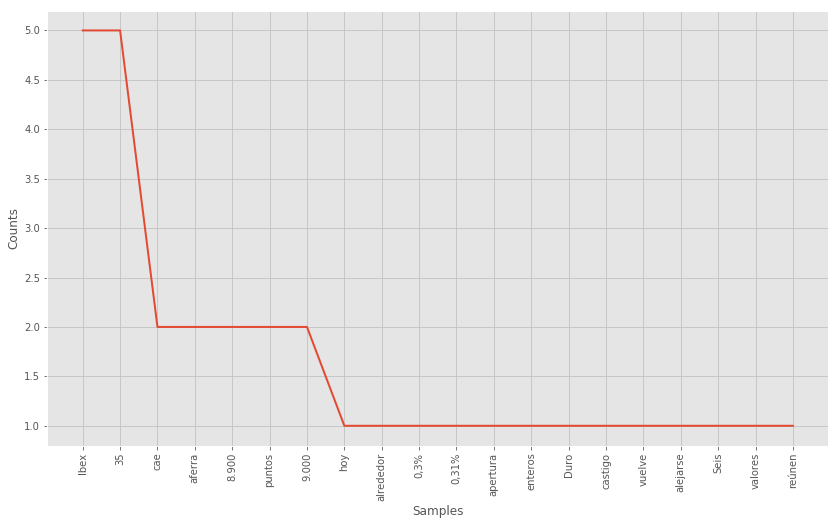

In [0]:
plt.figure(figsize=(14,8))
freq.plot(20, cumulative=False)

In [9]:
import datetime
print(type(datetime.datetime.now()))

print(datetime.date.today())
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

<class 'datetime.datetime'>
2019-03-12
2019-03-12 11:28


In [15]:
import pandas as pd

print(pd.to_datetime('today'))
print(type(pd.to_datetime('today')))
print(pd.to_datetime('now'))
print(pd.Timestamp("today"))
print(type(pd.Timestamp("today")))

2019-03-12 00:00:00
<class 'pandas._libs.tslib.Timestamp'>
2019-03-12 11:41:15
2019-03-12 11:41:15.842078
<class 'pandas._libs.tslib.Timestamp'>
